# Time to do some data cleaning!

In [2]:
#import packages that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
np.random.seed(42)
%matplotlib inline

In [3]:
#SQL database created - will use this to pull data


import sqlite3 as sl #import SQLite

con = sl.connect('tweets')
corpus = pd.read_sql("""
                    SELECT tweet_text, pos_rev, neg_rev, neutral_or_unknown, apple_product, google_product
                    FROM tweets
                    WHERE tweet_text != 'None'
                    """,con)
corpus.head(10)

,tweet_text,pos_rev,neg_rev,neutral_or_unknown,apple_product,google_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0,1,0,1,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,1,0,0,1,0
2,@swonderlin Can not wait for #iPad 2 also. The...,1,0,0,1,0
3,@sxsw I hope this year's festival isn't as cra...,0,1,0,1,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,1,0,0,0,1
5,@teachntech00 New iPad Apps For #SpeechTherapy...,0,0,1,0,0
6,"#SXSW is just starting, #CTIA is around the co...",1,0,0,0,1
7,Beautifully smart and simple idea RT @madebyma...,1,0,0,1,0
8,Counting down the days to #sxsw plus strong Ca...,1,0,0,1,0
9,Excited to meet the @samsungmobileus at #sxsw ...,1,0,0,0,1


In [4]:
print(corpus.pos_rev.value_counts())
print(corpus.neg_rev.value_counts())
print(corpus.neutral_or_unknown.value_counts())

0    6114
1    2978
Name: pos_rev, dtype: int64
0    8522
1     570
Name: neg_rev, dtype: int64
1    5388
0    3704
Name: neutral_or_unknown, dtype: int64


### large class imbalance - 2978 positive tweets, 570 negative tweets, 5388 neutral or unknown tweets

In [5]:
#major class imbalance 2978 positive tweets, 570 negative tweets, 5388 neutral or unknown tweets
print(corpus.apple_product.value_counts())
print(corpus.google_product.value_counts())

0    6683
1    2409
Name: apple_product, dtype: int64
0    8210
1     882
Name: google_product, dtype: int64


### also large imbalance between apple (2409) and google (882) products

In [6]:
# lets look at apple and google products separately

apple = pd.read_sql("""
                    SELECT tweet_text, pos_rev, neg_rev, neutral_or_unknown, apple_product
                    FROM tweets
                    WHERE tweet_text != 'None'
                          AND apple_product == 1
                    """,con)
apple.head(10)

,tweet_text,pos_rev,neg_rev,neutral_or_unknown,apple_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0,1,0,1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,1,0,0,1
2,@swonderlin Can not wait for #iPad 2 also. The...,1,0,0,1
3,@sxsw I hope this year's festival isn't as cra...,0,1,0,1
4,Beautifully smart and simple idea RT @madebyma...,1,0,0,1
5,Counting down the days to #sxsw plus strong Ca...,1,0,0,1
6,Great #sxsw ipad app from @madebymany: http://...,1,0,0,1
7,"haha, awesomely rad iPad app by @madebymany ht...",1,0,0,1
8,I just noticed DST is coming this weekend. How...,0,1,0,1
9,Just added my #SXSW flights to @planely. Match...,1,0,0,1


In [7]:
print(apple.pos_rev.value_counts())
print(apple.neg_rev.value_counts())
print(apple.neutral_or_unknown.value_counts())

1    1949
0     460
Name: pos_rev, dtype: int64
0    2021
1     388
Name: neg_rev, dtype: int64
0    2344
1      65
Name: neutral_or_unknown, dtype: int64


### large imbalance here too, 1949 positive, 388 negative, 65 neutral or unknown

In [8]:
#lets look at google

google = pd.read_sql("""
                    SELECT tweet_text, pos_rev, neg_rev, neutral_or_unknown, google_product
                    FROM tweets
                    WHERE tweet_text != 'None'
                          AND google_product == 1
                    """,con)
google.head(10)

,tweet_text,pos_rev,neg_rev,neutral_or_unknown,google_product
0,@sxtxstate great stuff on Fri #SXSW: Marissa M...,1,0,0,1
1,"#SXSW is just starting, #CTIA is around the co...",1,0,0,1
2,Excited to meet the @samsungmobileus at #sxsw ...,1,0,0,1
3,Find &amp; Start Impromptu Parties at #SXSW Wi...,1,0,0,1
4,"Foursquare ups the game, just in time for #SXS...",1,0,0,1
5,Gotta love this #SXSW Google Calendar featurin...,1,0,0,1
6,"Okay, this is really it: yay new @Foursquare f...",1,0,0,1
7,Really enjoying the changes in Gowalla 3.0 for...,1,0,0,1
8,someone started an #austin @PartnerHub group i...,1,0,0,1
9,"They were right, the @gowalla 3 app on #androi...",1,0,0,1


In [9]:
print(google.pos_rev.value_counts())
print(google.neg_rev.value_counts())
print(google.neutral_or_unknown.value_counts())

1    723
0    159
Name: pos_rev, dtype: int64
0    751
1    131
Name: neg_rev, dtype: int64
0    856
1     26
Name: neutral_or_unknown, dtype: int64


### large imbalance here too, 723 positive, 131 negative, 26 neutral or unknown

In [10]:
print(corpus.shape)
print(apple.shape)
print(google.shape)

(9092, 6)
(2409, 5)
(882, 5)


In [11]:
# do we have a lot of tweets that don't identify a product?  Looks like it, but let's see

none = pd.read_sql("""
                    SELECT tweet_text, pos_rev, neg_rev, neutral_or_unknown, apple_product, google_product
                    FROM tweets
                    WHERE tweet_text != 'None'
                          AND (apple_product == 0 and google_product == 0)
                    """,con)
none.head(10)

,tweet_text,pos_rev,neg_rev,neutral_or_unknown,apple_product,google_product
0,@teachntech00 New iPad Apps For #SpeechTherapy...,0,0,1,0,0
1,Holler Gram for iPad on the iTunes App Store -...,0,0,1,0,0
2,"Attn: All #SXSW frineds, @mention Register fo...",0,0,1,0,0
3,Anyone at #sxsw want to sell their old iPad?,0,0,1,0,0
4,Anyone at #SXSW who bought the new iPad want ...,0,0,1,0,0
5,At #sxsw. Oooh. RT @mention Google to Launch ...,0,0,1,0,0
6,SPIN Play - a new concept in music discovery f...,0,0,1,0,0
7,VatorNews - Google And Apple Force Print Media...,0,0,1,0,0
8,HootSuite - HootSuite Mobile for #SXSW ~ Updat...,0,0,1,0,0
9,Hey #SXSW - How long do you think it takes us ...,0,0,1,0,0


In [12]:
none.head()

,tweet_text,pos_rev,neg_rev,neutral_or_unknown,apple_product,google_product
0,@teachntech00 New iPad Apps For #SpeechTherapy...,0,0,1,0,0
1,Holler Gram for iPad on the iTunes App Store -...,0,0,1,0,0
2,"Attn: All #SXSW frineds, @mention Register fo...",0,0,1,0,0
3,Anyone at #sxsw want to sell their old iPad?,0,0,1,0,0
4,Anyone at #SXSW who bought the new iPad want ...,0,0,1,0,0


In [13]:
print(none.shape)
print(none.neutral_or_unknown.value_counts())
print(corpus.shape)
print(corpus.neutral_or_unknown.value_counts())

(5801, 6)
1    5297
0     504
Name: neutral_or_unknown, dtype: int64
(9092, 6)
1    5388
0    3704
Name: neutral_or_unknown, dtype: int64


### interesting, the entire set has 5388 neutral or unknown and the majority (5297) of those do not have a product listed.  It looks like this dataset was only rating the tweets for negative or positive emotion if there was a product associated with the tweet.  

In [14]:
#saving thse to csv files to work with later 

corpus.to_csv('../../data/corpus.csv')
apple.to_csv('../../data/apple.csv')
google.to_csv('../../data/google.csv')
none.to_csv('../../data/no_prod.csv')

## Let's build some quick baseline models

In [15]:
corp = pd.read_sql("""
                    SELECT tweet_text, is_there_an_emotion_directed_at_a_brand_or_product
                    FROM tweets
                    WHERE tweet_text != 'None'
                    """,con)
corp.head(10)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,No emotion toward brand or product
6,"#SXSW is just starting, #CTIA is around the co...",Positive emotion
7,Beautifully smart and simple idea RT @madebyma...,Positive emotion
8,Counting down the days to #sxsw plus strong Ca...,Positive emotion
9,Excited to meet the @samsungmobileus at #sxsw ...,Positive emotion


In [16]:
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [17]:
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer 
  

def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def doc_preparer(doc, stop_words=sw):
    '''  
    :param doc: a document from the corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in stop_words]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [18]:
X = corp.tweet_text.astype('str')
y = corp.is_there_an_emotion_directed_at_a_brand_or_product

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.25)

token_docs = [doc_preparer(doc, sw) for doc in X_train]
token_docs[0]

'perfect attention detail rt mention google recreate code pac man doodle original bug include sxsw googledoodles'

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
# Validation train-test split to build our best model
X_t, X_val, y_t, y_val = train_test_split(token_docs, y_train, test_size=.25, random_state=42)

cv = CountVectorizer()

X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)
X_t_vec

,aapl,aaron,aarpbulletin,ab,abandon,abba,abc,aber,ability,able,...,zlf,zms,zomb,zombie,zomg,zone,zoom,zuckerberg,zynga,zzzs
5190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_t_vec, y_t)

MultinomialNB()

In [22]:
prior_0 = y_t.value_counts()['Negative emotion']/len(y_t)
prior_1 = y_t.value_counts()['Positive emotion']/len(y_t)
prior_2 = y_t.value_counts()['No emotion toward brand or product']/len(y_t)
prior_3 = y_t.value_counts()['I can\'t tell']/len(y_t)
print(prior_0, prior_1, prior_2, prior_3)
print(np.log(prior_1))

0.05846695346108721 0.3228392647633946 0.6007039499413375 0.01798983183418068
-1.130600711931004


In [23]:
mnb.class_log_prior_

array([-4.01794858, -2.83929358, -0.50965306, -1.13060071])

In [24]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

y_hat = mnb.predict(X_t_vec)
print(accuracy_score(y_t, y_hat))
print(confusion_matrix(y_t,y_hat))

0.8120844739929605
[[   4    2   62   24]
 [   0  111  111   77]
 [   1   20 2812  239]
 [   0    1  424 1226]]


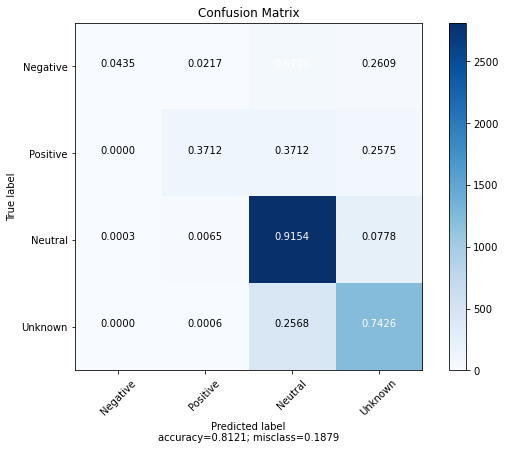

In [29]:
from sklearn.metrics import plot_confusion_matrix

import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(cm = np.array(confusion_matrix(y_t,y_hat)), 
                      normalize    = True,
                      target_names = ['Negative', 'Positive', 'Neutral' , 'Unknown'],
                      title        = "Confusion Matrix")



### initial model with no additional stop words removed = .81, not too bad!  However, it appears that what we are seeing here is likely being influenced by the really large class imbalance


let's remove the 'no emotion' and 'I can't tell' from our data and see what we get.


In [31]:
pos_neg =  pd.read_sql("""
                    SELECT tweet_text, is_there_an_emotion_directed_at_a_brand_or_product
                    FROM tweets
                    WHERE tweet_text != 'None'
                    AND is_there_an_emotion_directed_at_a_brand_or_product IN ('Positive emotion','Negative emotion')
                    """,con)
pos_neg.head(10)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
5,"#SXSW is just starting, #CTIA is around the co...",Positive emotion
6,Beautifully smart and simple idea RT @madebyma...,Positive emotion
7,Counting down the days to #sxsw plus strong Ca...,Positive emotion
8,Excited to meet the @samsungmobileus at #sxsw ...,Positive emotion
9,Find &amp; Start Impromptu Parties at #SXSW Wi...,Positive emotion


In [32]:
X = pos_neg.tweet_text.astype('str')
y = pos_neg.is_there_an_emotion_directed_at_a_brand_or_product

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.25)

token_docs = [doc_preparer(doc, sw) for doc in X_train]
token_docs[0]

'give away ipad x box book mention sxsw techenvy'

In [33]:
X_t, X_val, y_t, y_val = train_test_split(token_docs, y_train, test_size=.25, random_state=42)

X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)
X_t_vec

,aapl,abacus,abandon,aber,able,abroad,absolutely,abt,abuzz,academy,...,zazzlsxsw,zero,zimride,zing,zite,zms,zombie,zomg,zoom,zzzs
2900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
mnb.fit(X_t_vec, y_t)

MultinomialNB()

In [35]:
prior_0 = y_t.value_counts()['Negative emotion']/len(y_t)
prior_1 = y_t.value_counts()['Positive emotion']/len(y_t)
print(prior_0, prior_1)
print(np.log(prior_1))

0.1568922305764411 0.8431077694235589
-0.17066048879107043


In [36]:
mnb.class_log_prior_

array([-1.85219614, -0.17066049])

In [37]:
y_hat = mnb.predict(X_t_vec)
print(accuracy_score(y_t, y_hat))
print(confusion_matrix(y_t,y_hat))

0.9413533834586466
[[ 208  105]
 [  12 1670]]


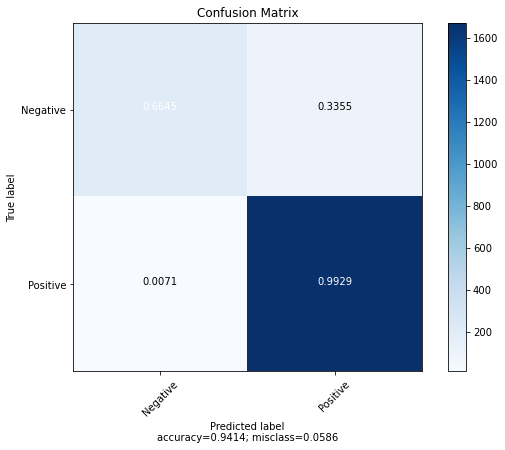

In [38]:
plot_confusion_matrix(cm = np.array(confusion_matrix(y_t,y_hat)), 
                      normalize    = True,
                      target_names = ['Negative', 'Positive'],
                      title        = "Confusion Matrix")

### this is a much better accuracy score (.94), but the confusion matrix shows that the model is best at correctly identifying positive emotion, for our purposes we want the negative emotion tweets to be correctly optimized


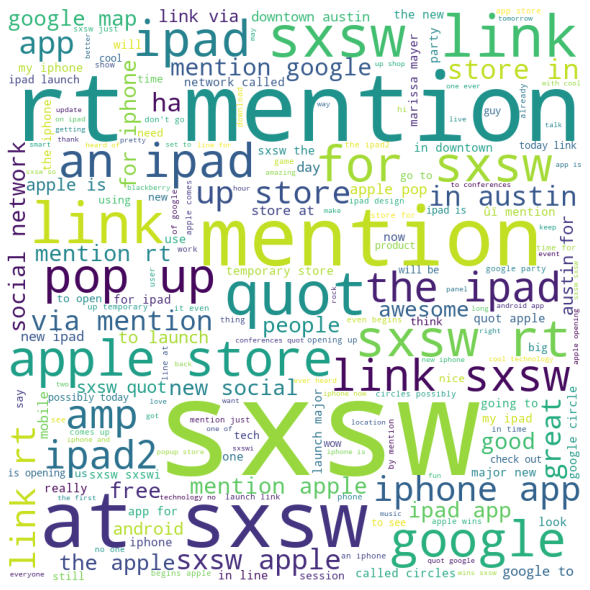

In [39]:
#Let's try a word cloud
from wordcloud import WordCloud, STOPWORDS 

pos = pos_neg

comment_words = '' 
stopwords = set(STOPWORDS) 

for word in pos.tweet_text:
    word = str(word)
    tokens = word.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                      stopwords = stopwords, min_font_size = 10).generate(comment_words) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

too much going on in this to really give us an idea of what is happening.

In [40]:
import re

def preprocess(text):
    clean_data = []
    for x in (text): #this is Df_pd for Df_np (text[:])
        new_text = re.sub('<.*?>', '', x)   # remove HTML tags
        new_text = re.sub(r'[^\w\s]', '', new_text) # remove punc.
        new_text = re.sub(r'\d+','',new_text)# remove numbers
        new_text = new_text.lower() # lower case, .upper() for upper          
        if new_text != '':
            clean_data.append(new_text)
    return clean_data

In [41]:
preprocess(pos_neg)

['tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product']

In [42]:
def tokenization_w(words):
    w_new = []
    for w in (words[:][:]):  # for NumPy = words[:]
        w_token = word_tokenize(w)
        if w_token != '':
            w_new.append(w_token)
    return w_new

In [43]:
tokenization_w(pos_neg)

[['tweet_text'], ['is_there_an_emotion_directed_at_a_brand_or_product']]

In [44]:
reviews_df = pos_neg.sample(frac = 0.1, replace = False, random_state=42)
reviews_df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
299,New Post: iPad 2 Launches to Huge Lines at App...,Positive emotion
2550,RT @mention NYT app for iPad: not &quot;here's...,Positive emotion
3080,Steve Jobs doesn't position the iPhone as a de...,Negative emotion
2342,RT @mention Google Circles will be toast if it...,Negative emotion
1211,Thanks @mention for giving me new top cover fo...,Positive emotion
...,...,...
2144,RT @mention &quot;There's a reason why Google ...,Negative emotion
2115,RT @mention @mention Just won an HTML5 t-shirt...,Positive emotion
2465,"RT @mention It's a model for one, not for all....",Positive emotion
1793,Fab! RT @mention RT @mention So @mention just ...,Positive emotion


In [45]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
pos_neg["tweet_text"] = pos_neg["tweet_text"].apply(lambda x: clean_text(x))

lets look at polarity = this is a measure on how extremely negative (-1) or positive (1) a tweet is based on the polarity dictionary. 

In [46]:
from textblob import TextBlob

pos_neg['polarity'] = pos_neg['tweet_text'].map(lambda text: TextBlob(text).sentiment.polarity)

pos_neg.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,polarity
0,iphone hr tweet rise_austin dead need upgrade ...,Negative emotion,-0.200000
1,jessedee know fludapp awesome ipad/iphone app ...,Positive emotion,0.466667
2,swonderlin wait ipad also sale sxsw,Positive emotion,0.000000
3,sxsw hope year's festival crashy year's iphone...,Negative emotion,0.000000
4,sxtxstate great stuff fri sxsw marissa mayer g...,Positive emotion,0.800000


In [47]:
print('5 random reviews with highest positive polarity:')
cl = pos_neg.loc[pos_neg.polarity == 1, ['tweet_text']].sample(5).values
for c in cl:
    print(c[0])
    
print('5 random reviews with most negative sentiment:')
cl = pos_neg.loc[pos_neg.polarity == -1, ['tweet_text']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with highest positive polarity:
buy downtown austin apple store min wait line get salesperson darryl excellent sxsw
holla rt mention google party best ever get butt sxsw
one best photo apps iphone ûó hipstamatic ûó get apps sxsw hipstamatic link
awesome iphones etc at&amp;t wifi frozen sxsw tmobile teathering android work like charm
company company best supply chain walmart apple behance sxsw
5 random reviews with most negative sentiment:
link insane even reason go sxsw sxsw appletogo
cant wait give samsung people demo horrible terrible google nexus phone sxsw
rt mention line apple store insane sxsw
rt mention line ppl around block sxsw party apple store insane link
rt mention cant wait give samsung people demo horrible terrible google nexus phone sxsw



Judging from the random sampling of tweets, the polarity score looks to be picking up on emotion pretty well. 

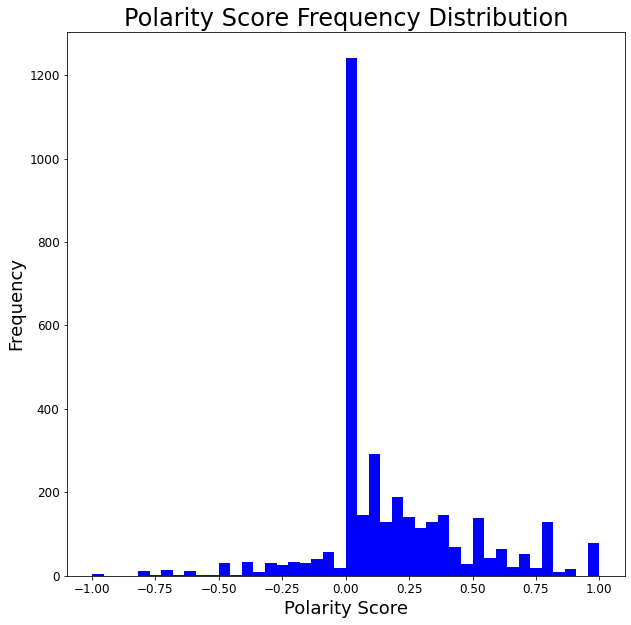

In [48]:
#let's take a look at the distribution 

x = pos_neg['polarity']

plt.figure(figsize=(10,10))
plt.hist(x,bins='auto',color = 'blue')
plt.xlabel('Polarity Score', fontsize=18)
plt.xticks(fontsize=12)
plt.ylabel('Frequency', fontsize=18)
plt.yticks(fontsize=12)
plt.title('Polarity Score Frequency Distribution', fontsize = 24);

hmmmmmm, this set did not include any tweets identified as neutral, let's see what the distribution looks like of emotion


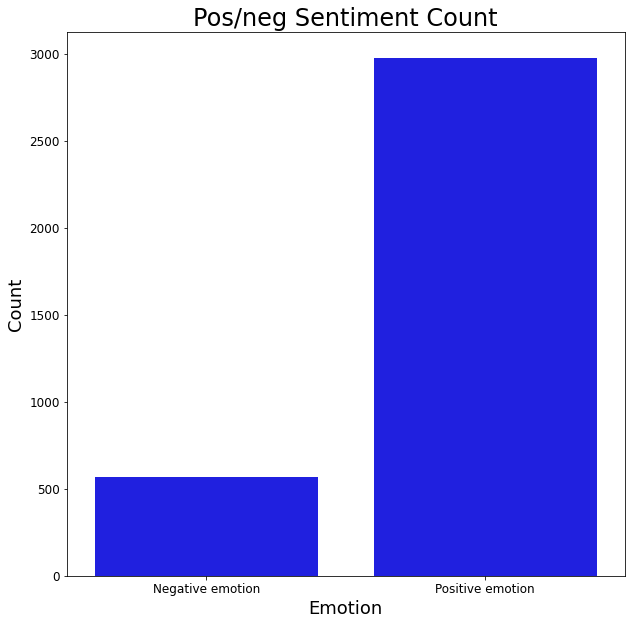

In [49]:
import seaborn as sns

x = pos_neg['is_there_an_emotion_directed_at_a_brand_or_product']

plt.figure(figsize=(10,10))
sns.countplot(x,color = 'blue')
plt.xlabel('Emotion', fontsize=18)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=18)
plt.yticks(fontsize=12)
plt.title('Pos/neg Sentiment Count', fontsize = 24);

odd, none of the tweets were tagged as neutral by the humans reviewing them, but the polarity score indicates a large number of tweets were actually neutral.  Lets take a look 

In [50]:
neutral = pos_neg[pos_neg.polarity.eq(0)]
neutral

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,polarity
2,swonderlin wait ipad also sale sxsw,Positive emotion,0.0
3,sxsw hope year's festival crashy year's iphone...,Negative emotion,0.0
9,find amp start impromptu party sxsw hurricanep...,Positive emotion,0.0
28,must app ipad go sxsw hollergram,Positive emotion,0.0
32,û÷#smartcoverûª open instant access wait get...,Positive emotion,0.0
...,...,...,...
3539,mention see line sxsw front apple store nothin...,Positive emotion,0.0
3540,know make sxsw see bunch grow men hoot get ipad,Positive emotion,0.0
3541,essential sxsw mine pocket camera laptop ipad ...,Positive emotion,0.0
3546,i've always use camera iphone b/c image stabil...,Positive emotion,0.0


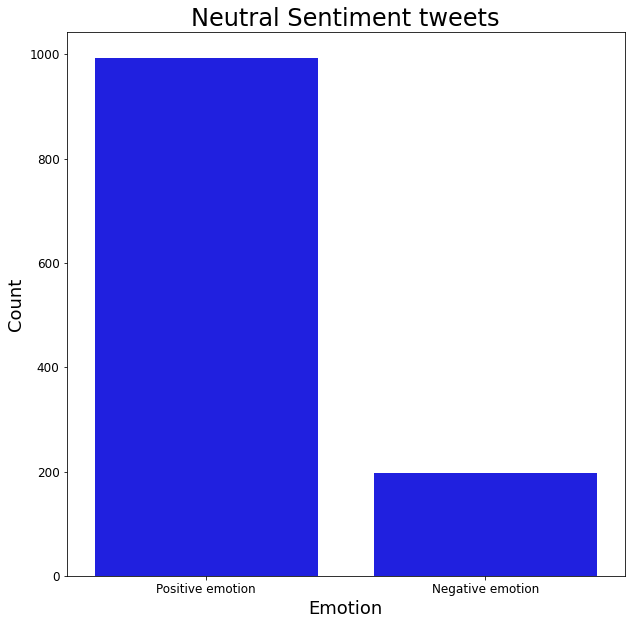

In [51]:
import seaborn as sns

x = neutral['is_there_an_emotion_directed_at_a_brand_or_product']

plt.figure(figsize=(10,10))
sns.countplot(x,color = 'blue')
plt.xlabel('Emotion', fontsize=18)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=18)
plt.yticks(fontsize=12)
plt.title('Neutral Sentiment tweets', fontsize = 24);

Interesting, it looks like the 0 polarity score is picking up about the same percentage of pos and neg identified tweets.  

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(pos_neg['tweet_text'], 20)
for word, freq in common_words:
    print(word, freq)
    
df = pd.DataFrame(common_words, columns = ['tweet_text' , 'count'])

sxsw 3730
mention 2508
link 1327
ipad 1219
rt 1075
apple 1055
google 888
iphone 712
quot 623
store 605
app 458
new 406
get 334
austin 323
pop 235
amp 233
android 233
launch 224
go 215
open 193


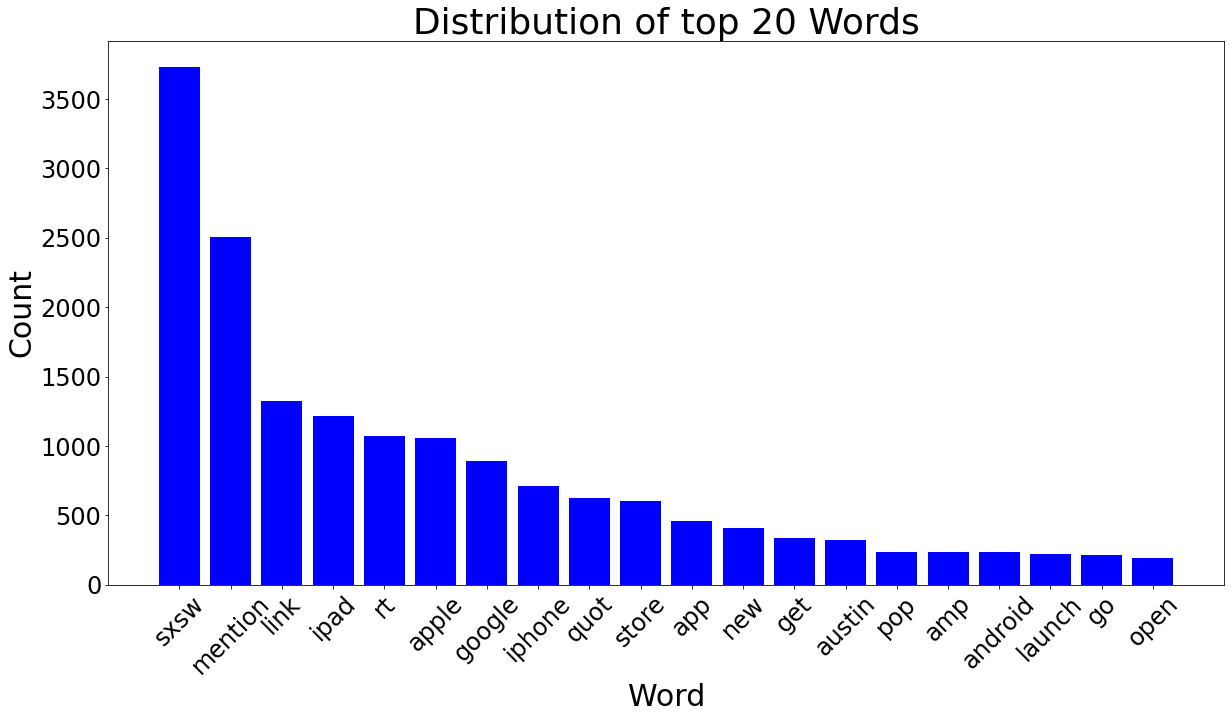

In [53]:
x = df['tweet_text']
y = df['count']

plt.figure(figsize=(20,10))
plt.bar(x,y,color = 'blue')
plt.xlabel('Word', fontsize = 30)
plt.xticks(rotation=45, fontsize=24)
plt.ylabel('Count', fontsize = 30)
plt.yticks(fontsize=24)
plt.title('Distribution of top 20 Words', fontsize=36);

it probably makes sense to remove most of these.  

In [54]:
custom_sw = stopwords.words('english')
custom_sw.extend(["sxsw","mention","link","ipad","rt","apple","google","iphone",
                  "quot","store","app","new","get","austin","pop","amp","android","launch","go","open"] )
custom_sw[-10:]

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=custom_sw).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(pos_neg['tweet_text'], 20)

for word, freq in common_words:
    print(word, freq)

df1 = pd.DataFrame(common_words, columns = ['tweet_text' , 'count'])


one 174
line 169
come 166
time 163
like 162
party 161
social 155
use 150
great 149
via 146
win 146
circle 146
day 145
today 135
see 130
free 128
map 128
cool 126
good 122
look 119


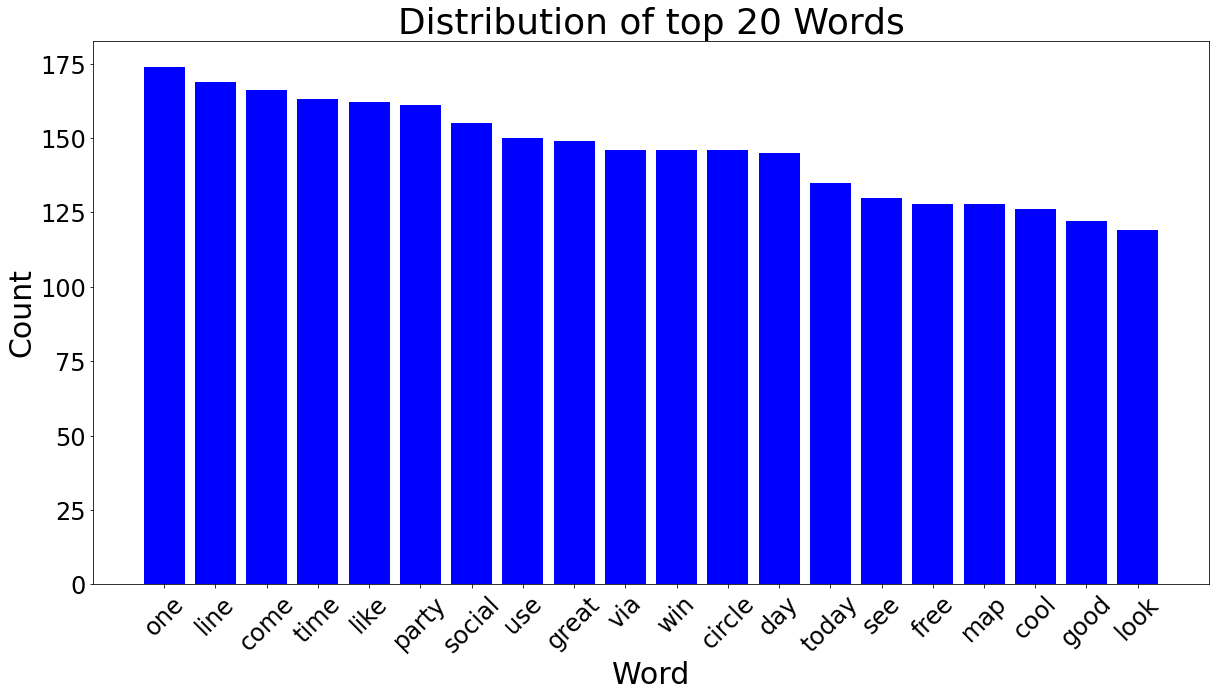

In [55]:
x = df1['tweet_text']
y = df1['count']

plt.figure(figsize=(20,10))
plt.bar(x,y,color = 'blue')
plt.xlabel('Word', fontsize = 30)
plt.xticks(rotation=45, fontsize=24)
plt.ylabel('Count', fontsize = 30)
plt.yticks(fontsize=24)
plt.title('Distribution of top 20 Words', fontsize=36);

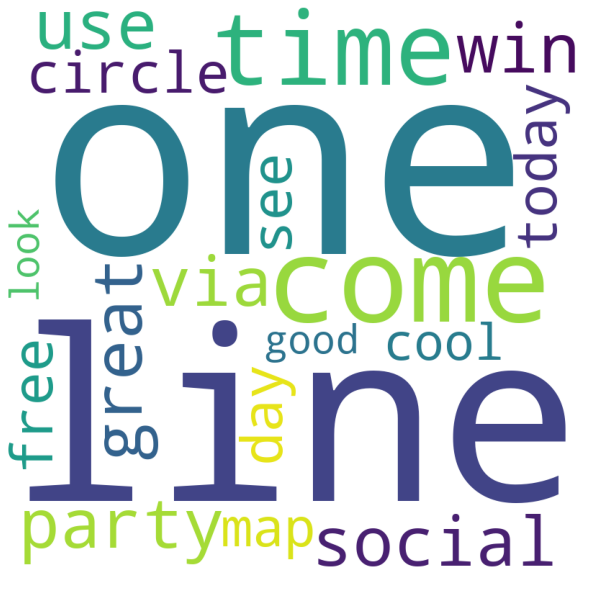

In [56]:
from wordcloud import WordCloud, STOPWORDS 

pos = df1

comment_words = '' 
stopwords = set(STOPWORDS) 

for word in pos.tweet_text:
    word = str(word)
    tokens = word.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                      stopwords = stopwords, min_font_size = 10).generate(comment_words) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
pos_neg.head()

let's see if taking out the additional stop words improved the model

In [ ]:
model_2 =  pd.read_sql("""
                    SELECT tweet_text, is_there_an_emotion_directed_at_a_brand_or_product
                    FROM tweets
                    WHERE tweet_text != 'None'
                    AND is_there_an_emotion_directed_at_a_brand_or_product IN ('Positive emotion','Negative emotion')
                    """,con)
model_2.head(10)

In [ ]:
print(model_2.is_there_an_emotion_directed_at_a_brand_or_product.value_counts())

In [ ]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def doc_preparer(doc, stop_words=custom_sw):
    '''  
    :param doc: a document from the corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in stop_words]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [ ]:
X2 = model_2.tweet_text.astype('str')
y2 = model_2.is_there_an_emotion_directed_at_a_brand_or_product

Xm2_train, Xm2_test, ym2_train, ym2_test = train_test_split(X2,y2, random_state=42, test_size=.25)

token_docs = [doc_preparer(doc, sw) for doc in X_train]
token_docs[0]

In [ ]:
Xm2_t, Xm2_val, ym2_t, ym2_val = train_test_split(token_docs, ym2_train, test_size=.25, random_state=42)

cv = CountVectorizer()

Xm2_t_vec = cv.fit_transform(Xm2_t)
Xm2_t_vec  = pd.DataFrame.sparse.from_spmatrix(Xm2_t_vec)
Xm2_t_vec.columns = sorted(cv.vocabulary_)
Xm2_t_vec.set_index(ym2_t.index, inplace=True)
Xm2_t_vec

In [ ]:
mnbm2 = MultinomialNB()
mnbm2.fit(Xm2_t_vec, ym2_t)

In [ ]:
prior_0 = ym2_t.value_counts()['Negative emotion']/len(y_t)
prior_1 = ym2_t.value_counts()['Positive emotion']/len(y_t)
print(prior_0, prior_1)
print(np.log(prior_1))

In [ ]:
ym2_hat = mnbm2.predict(Xm2_t_vec)
print(accuracy_score(ym2_t, ym2_hat))
print(confusion_matrix(ym2_t,ym2_hat))

## going to try a completely different approach -- starting a new notebook